# Bài toán Perceptron
Bài toán Perceptron được phát biểu như sau: Cho hai class được gán nhãn, hãy tìm một đường phẳng sao cho toàn bộ các điểm thuộc class 1 nằm về 1 phía, toàn bộ các điểm thuộc class 2 nằm về phía còn lại của đường phẳng đó. Với giả định rằng tồn tại một đường phẳng như thế.

# Thuật toán Perceptron
- Tập dữ liệu $\mathbf{X} = \mathbf[x_1, x_2, ..., x_N]$ $\in \mathbb{R}^{d \times N}$ (trong đó các điểm dữ liệu là các vector cột) \
- Label $\mathbf{y} = [y_1, ..., y_N]$ trong đó $y_i = 1$ nếu $x_i$ thuộc class 1 và $y_i = -1$ nếu $x_i$ thuộc class 2 \
- Tại mỗi thời điểm giả sử tìm được boudary có dạng:
$$\begin{align*}
    \mathbf{f_w(x)} &= w_1x_1 + w_2x_2 + ... + w_dx_d + w_0 \\
                    &= \mathbf{w^T} \bar{\mathbf{x}} = 0
\end{align*}$$
Trong đó $\mathbf{\bar{x}}$ là ma trận thu được bằng cách theo vector 1 vào dữ liệu $\mathbf{X}$ \
- Nhận xét các điểm nằm về cùng 1 phía của boudary sẽ cùng dấu => Nếu $\mathbf{w}$ là nghiệm của bài toán Perceptron thì với mỗi dữ liệu $\mathbf{x}$ chưa được gán nhãn, ta có thể xác định class của nó như sau: $label(\mathbf{x}) = 1$ if $\mathbf{w^T x} \geq 0$ , otherwise = -1
- Hay $label(\mathbf{w^T x}) = sgn(\mathbf{w^T x})$



## Hàm mất mát
- Cần tối thiểu số điểm bị phân loại sai. Phân loại sai thì $y_i \ne sgn(\mathbf{w^T x_i})$. $\Rightarrow$ Ta có hàm mất mát:
      $$ \mathbf{J(x)} = \sum_{x_i \in M} (-y_i sgn(\mathbf{w^T x_i})) $$
- Tuy nhiên $sgn()$ rời rạc không có đạo hàm. => cần xây dựng hàm mất mát khác là:
      $$\mathbf{J(x)} =  \sum_{x_i \in M} (-y_i \mathbf{w^T x_i})$$
  Khi phân loại sai thì $y_i$ và $\mathbf{w^T x_i}$ khác dấu $\Rightarrow$ $\mathbf{x_i}$ càng cách xa đường phân loại và bị phân loại sai thì $-y_i \mathbf{w^T x_i}$ càng lớn.


## Tối ưu hàm mất mát
- Sử dụng Stochastic Gradient descent
- Đạo hàm hàm mất mát tại từng điểm dữ liệu:
      $$ \nabla_{\mathbf{w}} J(\mathbf{x}_i;y_i; \mathbf{w}) = -y_i \mathbf{x}_i$$
- Công thức cập nhật cho $\mathbf{w}$ theo stochastic gradient descent:
      $$\mathbf{w} = \mathbf{w} + \eta y_i \mathbf{x}_i $$

## Tóm tắt thuật toán
1. Chọn ngẫu nhiên $\mathbf{w}$ với các hệ số gần 0
2. Duyệt qua từng điểm dữ liệu:
   - Nếu $\mathbf{x_i}$ phân lớp đúng tức là $sgn(\mathbf{x_i}) = y_i$ không cần làm gì
   - Ngược lại cập nhât $\mathbf{w}$ theo công thức $\mathbf{w} = \mathbf{w} + \eta y_i \mathbf{x_i}$
3. Kiểm tra xem còn bao nhiêu điểm bị missclass. Nếu ko còn điểm nào thì dừng thuật toán. Nếu ko quay lại bước 2

## Ví dụ bằng python

In [65]:
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(2)

means = [[2, 6], [4, 6]] # lưu giá trị trung bình
cov = [[.3, .2], [.2, .3]]
N = 50
X0 = np.random.multivariate_normal(means[0], cov, N).T 
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(X0)

[[2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 2.47403369 2.09281249
  2.22222334 2.58438569 2.74493118 1.6355797  3.19217738 1.51075436
  1.93784332 1.8787214  1.98435063 2.54694067 1.34122073 1.68360306
  2.39495504 1.58503193 2.20448688 1.49739755 2.2036588  2.30754036
  2.23924788 1.94688854 3.00981847 2.66070614 1.57343827 2.13824618
  2.17589085 2.1950674  3.35017416 2.10713714 2.11200125 1.3085396
  2.51153392 1.04405478 2.15254162 1.68244384 1.58334917 2.63624444
  1.85831694 1.93727986]
 [6.19579728 7.43487375 6.70849736 5.47010441 6.32571583 6.23682627
  5.72925457 5.59716548 6.27230351 6.37595358 6.4040742  5.65061706
  6.11659863 6.05326933 6.67628604 6.63347726 7.2425902  6.11880111
  5.56029947 6.12126884 6.32915756 7.32114999 5.19110126 5.70505616
  6.43418025 5.41460218 6.17118254 6.06910612 6.43102051 5.47634363
  6.1800686  6.0926817  7.03050457 6.01696944 5.9022653  6.51500409
  6.20562564 6.90367155 

In [66]:
def sgn(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(sgn(w, X), y) 

def perceptron(X, y, w_init, learning_rate):
    w = [w_init]
    N = X.shape[1] # số điểm dữ liệu
    d = X.shape[0] # chiều của 1 điểm dữ liệu
    mis_points = []
    while True:
        mix_id = np.random.permutation(N) #Trộn dữ liệu => Thu được 1 tập các id bất kỳ
        for i in range(N): 
            xi = X[:, mix_id[i]].reshape(d, 1) 
            yi = y[0, mix_id[i]]
            if sgn(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i]) 
                w_new = w[-1] + yi * xi * learning_rate 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w[-1], mis_points)



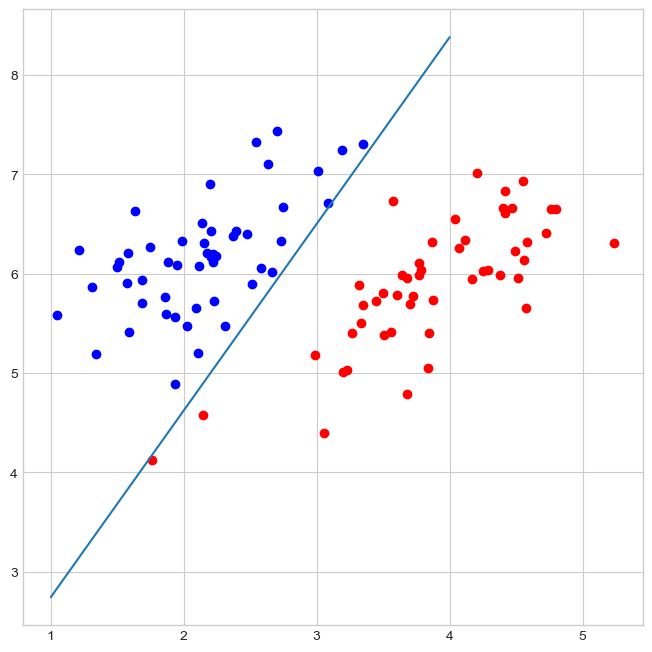

In [67]:
d = X.shape[0]
w_init = np.random.randn(d, 1) # phân phối chuẩn với shape = (3, 1) mean = 0, var = 1
(w, m) = perceptron(X, y, w_init, 0.5)

# show data 
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X0[0], X0[1], color="blue")
ax.scatter(X1[0], X1[1], color="red")
## show line
x1 = [1, 4]
# w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
x2 = [-(w[0] + w[1] * x1[0] )/w[2], -(w[0] + w[1] * x1[1] )/w[2]]
ax.plot(x1, x2)
